### **EXPLORATORY DATA ANALYSIS AND PRE-PROCESSING**



*   Exploring Data 
*   Preprocessing and Cleaning:
     1.   Handling missing values
     2.   Handling outliers
     3.   Handling categorical data
     4.   Handling skewness
     5.   Scaling
     6.   Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML /Dataset/cars.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


INFERENCE : Although normalized-losses and horsepower are numeric columns there data type of columns is object,so need to see unique values of both columns

In [4]:
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [5]:
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

INFERENCE : '?' in both columns indicating the missing values
#### **1) Handling Missing Values**

In [6]:
#step1 - use replace 
df['normalized-losses'].replace("?",np.nan,inplace=True)
df['horsepower'].replace("?",np.nan,inplace=True)

#step2 - change the datatype to float
df['normalized-losses']=df['normalized-losses'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')


#step3 - cal the mean for the cols
nmean = df['normalized-losses'].mean()
hmean = df['horsepower'].mean()

#step4 - use fillna 
df['normalized-losses'].fillna(nmean,inplace=True)
df['horsepower'].fillna(hmean,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


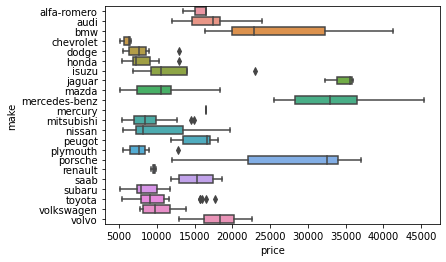

In [9]:
sns.boxplot(data=df,x='price',y='make')
plt.show()

INFERENCE : Boxplot above indicating the outliers are present in data

#### **2) Handling the Outliers**

#### **Dodge**

In [10]:
#Filtering out the outliers for dodge 
df[(df['make']=='dodge') & (df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [11]:
#Dropping the outliers
df.drop(29,inplace=True)

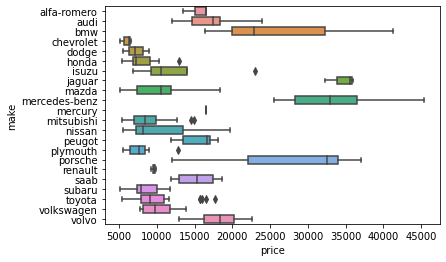

In [12]:
sns.boxplot(data=df,x='price',y='make')
plt.show()

#### **Honda**

In [13]:
df[(df['make']=='honda') & (df['price']>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [14]:
df.drop(41,inplace=True)

#### **Isuzu**

In [15]:
df[(df['make']=='isuzu') & (df['price']>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [16]:
df.drop(45,inplace=True)

#### **Mitsubishi**

In [17]:
df[(df['make']=='mitsubishi') & (df['price']>13000)]#### **Dodge**

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [18]:
df.drop([83,84],inplace=True)

#### **Plymouth**

In [19]:
df[(df['make']=='plymouth') & (df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [20]:
df.drop(124,inplace=True)

#### **Toyota**

In [21]:
df[(df['make']=='toyota') & (df['price']>14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [22]:
df.drop([172,178,179,180,181],inplace=True)

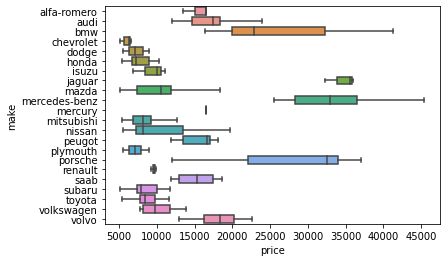

In [23]:
sns.boxplot(data=df,x='price',y='make')
plt.show()

INFERENCE : Above boxplot indicates that all the outliers are been handled 

####**3) Handling categorical data**

In [24]:
#Separating categorical and numerical data
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(['int64','float64'])

In [25]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [26]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [27]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

In [28]:
for col in df_cat:
  le=LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])

In [29]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


#### **4) Handling Skewness**

In [30]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [31]:
from scipy.stats import skew

symboling
0.21386866184357742


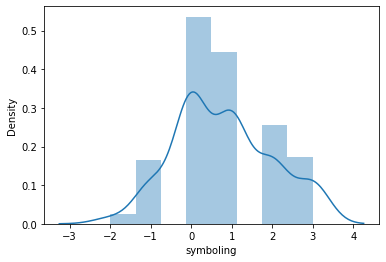

normalized-losses
0.848205953606264


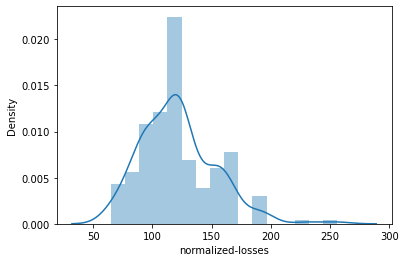

width
0.9140400320504322


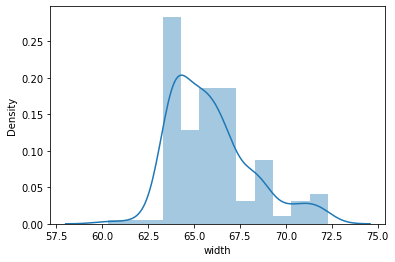

height
0.013839962443639326


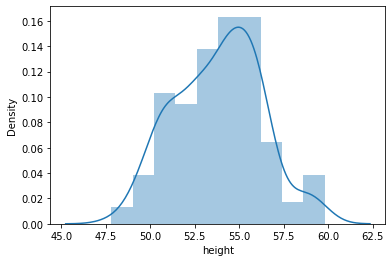

engine-size
2.0541257626466156


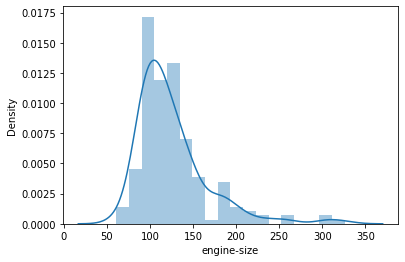

horsepower
1.5556576549504106


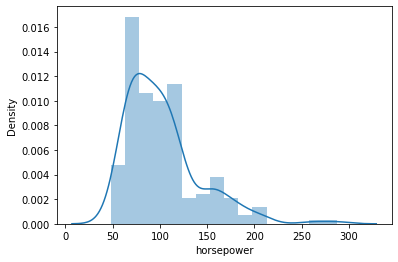

city-mpg
0.5999073033714895


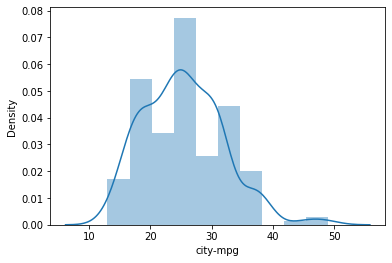

highway-mpg
0.4760310091695327


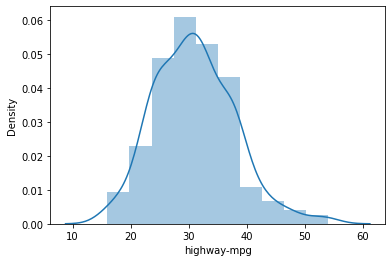

price
1.8166794702973463


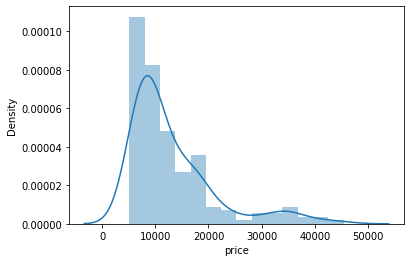

In [32]:
for col in df_num:
  print(col)
  print(skew(df_num[col]))

  plt.figure()
  sns.distplot(df_num[col])
  plt.show()

INFERENCE : Above distplot indicates that all the columns have skewness except height.

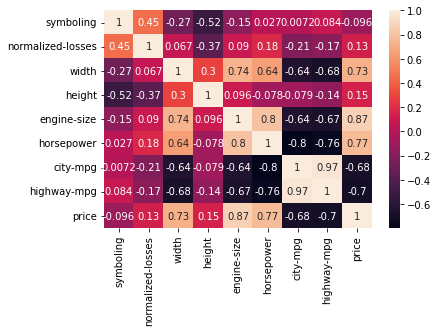

In [33]:
sns.heatmap(df_num.corr(), annot=True)
plt.show()

INFERENCE : Above heatmap indicates that all the columns except symboling,normalized-losses,height have good correlation with target column(price).Hence,we will not able to remove the skewness ,because if we do that then their co-relation with the target will also be changed.

Also we will not be able to remove the skewness of symboling column as it has negative values. 

In [34]:
# Removing skewness 
df_num["normalized-losses"] = np.sqrt(df_num["normalized-losses"])

skewness:  0.4136415061835428


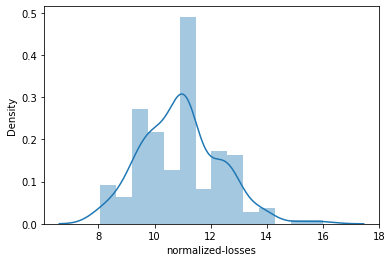

In [35]:
print("skewness: ",skew(df_num["normalized-losses"]))
sns.distplot(df_num["normalized-losses"])
plt.show()

In [36]:
#Concatenating the numerical and categorical columns
df_new = pd.concat([df_cat,df_num],axis=1)

#### **5) Scaling**

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
for col in df_new:
  sc = StandardScaler()
  df_new[col]=sc.fit_transform(df_new[[col]])

In [39]:
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-3.110852,1.846173,0.082835,-0.820757,-2.056808,0.104252,0.218578,-0.675762,-0.580474,0.050618
1,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-3.110852,1.846173,0.082835,-0.820757,-2.056808,0.104252,0.218578,-0.675762,-0.580474,0.423708
2,-1.934007,0.339032,-0.748984,1.234608,-0.125327,1.943631,0.176441,0.082835,-0.179636,-0.582442,0.628957,1.315353,-0.982065,-0.726156,0.423708
3,-1.774620,0.339032,0.432341,-0.566249,-0.125327,-0.078162,1.011307,1.349433,0.140924,0.195695,-0.396602,-0.010980,-0.216307,-0.143429,0.107109
4,-1.774620,0.339032,0.432341,-2.367105,-0.125327,-0.078162,1.011307,1.349433,0.232512,0.195695,0.247354,0.320603,-1.135217,-1.308883,0.541657


#### **6) Feature Engineering**

In [40]:
df_new["area"] = df_new["height"] * df_new["width"]

In [41]:
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,area
0,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-3.110852,1.846173,0.082835,-0.820757,-2.056808,0.104252,0.218578,-0.675762,-0.580474,0.050618,1.688139
1,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-3.110852,1.846173,0.082835,-0.820757,-2.056808,0.104252,0.218578,-0.675762,-0.580474,0.423708,1.688139
2,-1.934007,0.339032,-0.748984,1.234608,-0.125327,1.943631,0.176441,0.082835,-0.179636,-0.582442,0.628957,1.315353,-0.982065,-0.726156,0.423708,0.104628
3,-1.774620,0.339032,0.432341,-0.566249,-0.125327,-0.078162,1.011307,1.349433,0.140924,0.195695,-0.396602,-0.010980,-0.216307,-0.143429,0.107109,0.027578
4,-1.774620,0.339032,0.432341,-2.367105,-0.125327,-0.078162,1.011307,1.349433,0.232512,0.195695,0.247354,0.320603,-1.135217,-1.308883,0.541657,0.045502
